In [45]:
import os, shutil
import pandas as pd

In [2]:
#original_dataset_dir = "C:/Users/Business Intelli/Desktop/cats vs dogs/"

base_dir = "C:/Users/Business Intelli/Desktop/cats vs dogs"
#os.mkdir(base_dir)

In [3]:
train_dir =  "C:/Users/Business Intelli/Desktop/cats vs dogs/train"

test_dir = "C:/Users/Business Intelli/Desktop/cats vs dogs/test"

In [39]:
print('total training horse images:', len(os.listdir(test_dir)))

total training horse images: 12500


In [5]:
train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)



#test_dogs_dir = os.path.join(test_dir, "dogs")
#os.mkdir(test_dogs_dir)


In [6]:
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

In [7]:
fnames = ["cat.{}.jpg".format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(train_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    

In [8]:
fnames = ["cat.{}.jpg".format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(train_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ["dog.{}.jpg".format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(train_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ["dog.{}.jpg".format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(train_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [11]:
print("total training cat images:", len(os.listdir(train_cats_dir)))
print("total training dog images:", len(os.listdir(train_dogs_dir)))
print("total validation cat images:", len(os.listdir(validation_cats_dir)))
print("total validation dog images:", len(os.listdir(validation_dogs_dir)))

total training cat images: 5000
total training dog images: 5000
total validation cat images: 2500
total validation dog images: 2500


In [12]:
from keras import layers
from keras import models
import tensorflow as tf

Using TensorFlow backend.


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________

In [15]:
from keras import optimizers

from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder

model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(lr=1e-4), metrics = ["acc"])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#train_datagen = ImageDataGenerator(rescale = 1./255)
#validation_datagen = ImageDataGenerator(rescale = 1./255)

#train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 128, class_mode = "binary")
#validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 128, class_mode = "binary")


In [ ]:
#for data_batch, labels_batch in train_generator:
  #  print("data batch shape:", data_batch.shape)
  #  print("labels batch shape:", labels_batch.shape)
   # break

In [ ]:
#history = model.fit_generator(train_generator, steps_per_epoch = 80, epochs = 20, validation_data = validation_generator, validation_steps = 200)

#history = model.fit_generator(
   #   train_generator,
   #   steps_per_epoch = 100, 
    #  epochs=15,
     # verbose=1)

In [42]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2,
                                   height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 128, class_mode = "binary")
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 128, class_mode = "binary")



Found 10000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [18]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 80, epochs = 15, validation_data = validation_generator, validation_steps = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
80/80 [==============================] - 803s 10s/step - loss: 0.6908 - acc: 0.5253 - val_loss: 0.6748 - val_acc: 0.5716
Epoch 2/15
80/80 [==============================] - 974s 12s/step - loss: 0.6708 - acc: 0.5828 - val_loss: 0.6392 - val_acc: 0.6344
Epoch 3/15
80/80 [==============================] - 886s 11s/step - loss: 0.6551 - acc: 0.6106 - val_loss: 0.6429 - val_acc: 0.6010
Epoch 4/15
80/80 [==============================] - 841s 11s/step - loss: 0.6338 - acc: 0.6366 - val_loss: 0.6507 - val_acc: 0.6138
Epoch 5/15
80/80 [==============================] - 814s 10s/step - loss: 0.6186 - acc: 0.6495 - val_loss: 0.5888 - val_acc: 0.6800
Epoch 6/15
80/80 [==============================] - 886s 11s/step - loss: 0.6069 - acc: 0.6642 - val_loss: 0.5855 - val_acc: 0.6778
Epoch 7/15
80/80 [==============================] - 886s 11s/step - loss: 0.5991 - acc: 0.6775 - val_loss: 0.5397 - val_acc: 0.7308
Epoch 8/15
80/80 [==========

In [19]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

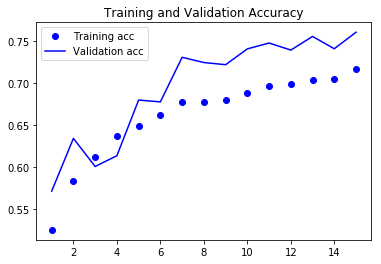

<Figure size 432x288 with 0 Axes>

In [20]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc" )
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

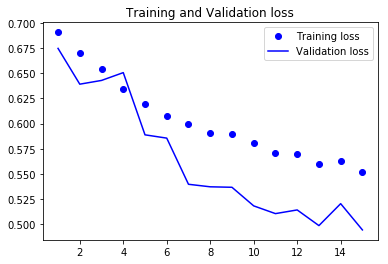

In [21]:
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [58]:
test_images_dir = os.path.join(test_dir, "images")
os.mkdir(test_images_dir)

In [62]:
fnames = ["{}.jpg".format(i) for i in range(12500)]
for fname in fnames:
    src = os.path.join(test_dir, fname)
    dst = os.path.join(test_images_dir, fname)
    shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Business Intelli/Desktop/cats vs dogs/test\\0.jpg'

In [63]:

test_datagen = ImageDataGenerator(rescale = 1./255)

#test_generator = test_datagen.flow_from_directory(test_dir, target_size =(150, 150), batch_size = 80, class_mode = None, shuffle = False)

test_generator = test_datagen.flow_from_directory(
    directory= test_dir,
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 12500 images belonging to 1 classes.


In [64]:
results = model.predict_generator(test_generator, steps = 32)

In [65]:
results

array([[0.7304186 ],
       [0.28576297],
       [0.3600347 ],
       ...,
       [0.2718118 ],
       [0.03278238],
       [0.97174305]], dtype=float32)